In [1]:
# import dataset using padnas library
import pandas as pd
data = pd.read_csv('Mall_customers.csv')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# print first 5 rows in dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# shape of dataset 

print("Data shape is: {}".format(data.shape))

Data shape is: (200, 5)


In [5]:
# dataset information, type of columns, ...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# how many NaN values we have in dataset

print(data.isna().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# print desrcibe statistics about Age, Annual Income, Spending Score

print(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe(percentiles=[0.1, .2, .25, .3, .4, .50, .6, .7, .75, .8, .9, .95, .99]))

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
10%     21.000000           23.900000               13.000000
20%     26.800000           37.800000               26.000000
25%     28.750000           41.500000               34.750000
30%     30.000000           46.000000               40.000000
40%     32.000000           54.000000               45.600000
50%     36.000000           61.500000               50.000000
60%     40.000000           67.000000               55.000000
70%     47.000000           74.300000               61.600000
75%     49.000000           78.000000               73.000000
80%     50.200000           78.200000               75.000000
90%     59.100000           93.400000               87.100000
95%     

In [8]:
# first quartile, median, 3th quartile

data['age_bins'] = pd.qcut(data['Age'], 4, labels=[0,1,2,3])

In [9]:
# statistics by column age_bins
# count of customer, age mean, age min, age max, annual income mean, spending score mean

data.groupby('age_bins').agg({'CustomerID':'count',
                              'Age':['mean', 'min', 'max'],
                              'Annual Income (k$)':'mean',
                              'Spending Score (1-100)':'mean'})

CustomerID        Age         Annual Income (k$)  \
              count       mean min max               mean   
age_bins                                                    
0                50  22.600000  18  28          51.440000   
1                54  32.500000  29  36          69.240741   
2                51  43.470588  37  49          65.764706   
3                45  59.288889  50  70          54.377778   

         Spending Score (1-100)  
                           mean  
age_bins                         
0                     56.780000  
1                     63.537037  
2                     40.039216  
3                     38.400000

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

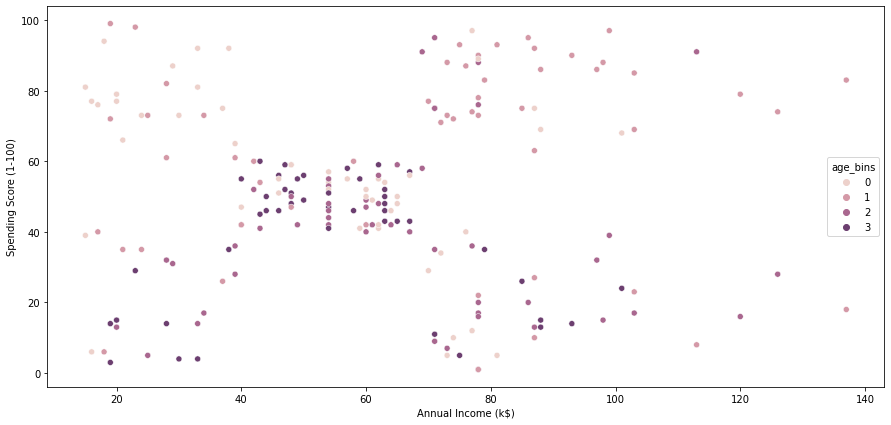

In [10]:
# bublle plot/seaborn

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

sns.scatterplot(
    data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue="age_bins",
    sizes=(20, 200), hue_norm=(0, 4), legend="full"
)

<AxesSubplot:xlabel='Age', ylabel='Count'>

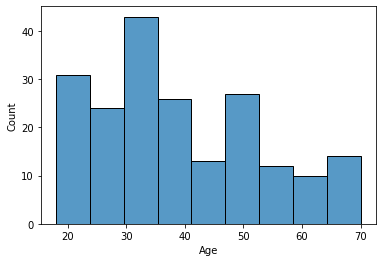

In [11]:
# distribution of Age

sns.histplot(data['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

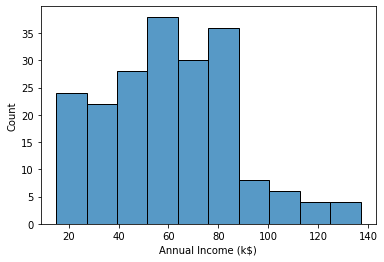

In [12]:
# distribution of Annual Income

sns.histplot(data['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

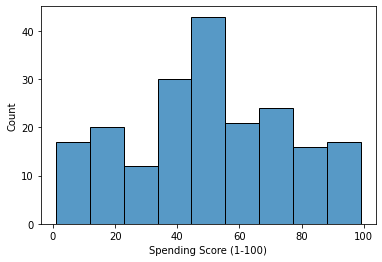

In [13]:
# distribution of Spending Score

sns.histplot(data['Spending Score (1-100)'])

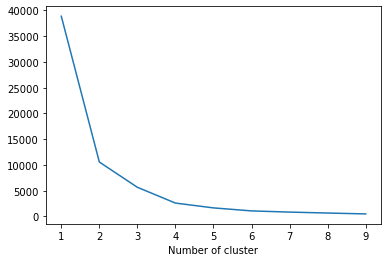

In [14]:
from sklearn.cluster import KMeans

sse={}
data_age = data[['Age']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_age)
    data_age["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [15]:
#function for ordering cluster numbers

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['Age']])
data['AgeCluster'] = kmeans.predict(data[['Age']])

data = order_cluster('AgeCluster', 'Age', data,False)

In [17]:
data.groupby('AgeCluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
AgeCluster,,,
0,61.941176,54.500000,38.647059
1,44.822581,63.677419,39.612903
2,27.740385,60.682692,60.288462


In [18]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
data['Cluster'] = kmeans.predict(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

data = order_cluster('Cluster', 'Age', data,False)

In [19]:
data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,44.894737,48.705263,42.631579
1,40.394737,87.000000,18.631579
2,32.692308,86.538462,82.128205
3,24.821429,28.714286,74.250000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

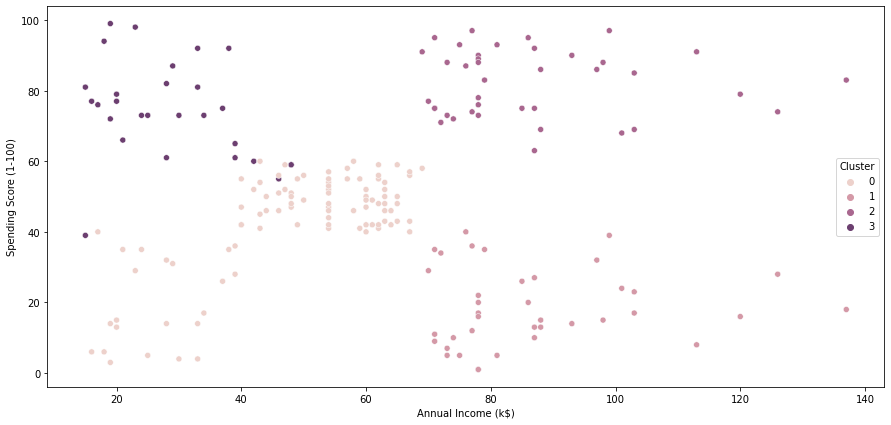

In [20]:
plt.figure(figsize=(15,7))

sns.scatterplot(
    data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster",
    sizes=(20, 200), hue_norm=(0, 4), legend="full"
)

In [21]:
data = data.drop(columns=['AgeCluster'])

In [22]:
data.groupby(['Cluster', 'Genre'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster Genre                                                        
0       Female  42.101695           48.355932               42.728814
        Male    49.472222           49.277778               42.472222
1       Female  41.388889           89.055556               23.722222
        Male    39.500000           85.150000               14.050000
2       Female  32.190476           86.047619               81.666667
        Male    33.277778           87.111111               82.666667
3       Female  25.857143           26.642857               79.142857
        Male    23.785714           30.785714               69.357143

In [23]:
# customer segmentation using KMeans by columns Annual Income & Spending Score
# we have here 3 clusters

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
data['ClusterScore'] = kmeans.predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

data = order_cluster('ClusterScore', 'Annual Income (k$)', data,False)

In [24]:
# mean by ClusterScore and Gender columns Age, Annual Income, Spending Score

data.groupby(['ClusterScore', 'Genre'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

Age  Annual Income (k$)  Spending Score (1-100)
ClusterScore Genre                                                        
0            Female  41.388889           89.055556               23.722222
             Male    39.500000           85.150000               14.050000
1            Female  32.190476           86.047619               81.666667
             Male    33.277778           87.111111               82.666667
2            Female  38.986301           44.191781               49.712329
             Male    42.280000           44.100000               50.000000

<AxesSubplot:xlabel='ClusterScore', ylabel='Frequency'>

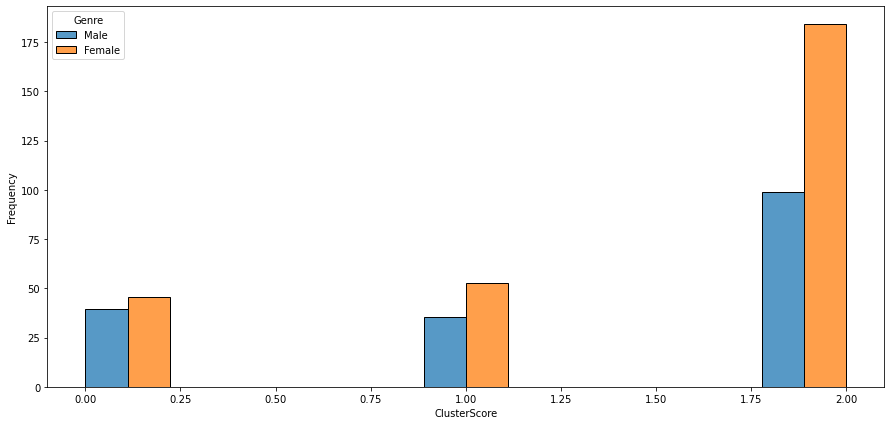

In [25]:
plt.figure(figsize=(15,7))
sns.histplot(data=data, x="ClusterScore", hue="Genre", stat="frequency", multiple="dodge")